# Read Files

In [1]:
import pandas as pd
import csv
import numpy as np

chartEvents = pd.read_csv('CHARTEVENTS.csv')
inputEvents = pd.read_csv('INPUTEVENTS_CV.csv')
labEvents = pd.read_csv('LABEVENTS.csv')
outputEvents = pd.read_csv('OUTPUTEVENTS-1.csv')

/Users/aiswaryasankar/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,9,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dItems = pd.read_csv('D_ITEMS.csv')
labItems = pd.read_csv('D_LABITEMS.csv')

# Testing

In [3]:
print(allConditionsDate.head())
print(times[:5])

NameError: name 'allConditionsDate' is not defined

In [4]:
conditions = [ 'Albumin', 'PH (Arterial)', 'pH' 'Calcium', 'Glucose', 'Hemoglobin', 
              'Magnesium', 'PTT', 'Potassium', 
              'SGPT', 'Arterial Blood Gas', 
              'BUN', 'Chloride', 'Bicarbonate', 'INR', 
              'Sodium', 'Arterial Lactate', 'CO2', 'Creatinine', 'Ionized Calcium', 
              'PT', 'PlateletsCount', 'SGOT', 
              'Total bilirubin', 'White Blood Cells', 'Non Invasive Blood Pressure diastolic', 
              'Non Invasive Blood Pressure systolic', 
              'Non Invasive Blood Pressure mean', 'pCO2', 'pO2', 'FiO2', 'PaO/FiO2 ratio', 'Respiratory Rate', 
             'Temperature', 'Weight', 'Heart Rate', 'SpO2']

# Extract needed columns
chartEvents = chartEvents[['CHARTTIME','SUBJECT_ID', 'ITEMID']]
inputEvents = inputEvents[['CHARTTIME','SUBJECT_ID', 'ITEMID']]
outputEvents = outputEvents[['CHARTTIME','SUBJECT_ID', 'ITEMID']]
labEvents = labEvents[['CHARTTIME','SUBJECT_ID', 'ITEMID']]



In [5]:
# Label the events
chartLabels = chartEvents.merge(dItems[['LABEL', 'ITEMID']], on='ITEMID')
inputs = inputEvents.merge(dItems[['LABEL', 'ITEMID']], on='ITEMID')
labeledOutputs = outputEvents.merge(dItems[['LABEL', 'ITEMID']], on='ITEMID')
labItemNames = labEvents.merge(labItems[['LABEL', 'ITEMID']], on='ITEMID')


In [6]:
# Include necessary conditions
labItemFinal = labItemNames[labItemNames['LABEL'].isin(conditions)]
inputFinal = inputs[inputs['LABEL'].isin(conditions)]
outputFinal = labeledOutputs[labeledOutputs['LABEL'].isin(conditions)]
chartFinal = chartLabels[chartLabels['LABEL'].isin(conditions)]

In [7]:
# Make one large table

allConditions = chartFinal.append(outputFinal)
allConditions = allConditions.append(inputFinal)
allConditions = allConditions.append(labItemFinal)
print(len(allConditions))

9541993


In [8]:
# Convert the charttime to dates
import numpy as np

times = allConditions['CHARTTIME']
year = [int(i.split('-')[0]) for i in times]
day = [int(i.split('-')[1]) for i in times]
month = [int(i.split('-')[2][:2]) for i in times]
date = [[str(month[i]) + '-' + str(day[i]) + '-' + str(year[i])] for i in range(len(month))]
month_day_year = pd.DataFrame(np.array(date), columns = ['date'])
allConditionsDate = pd.concat([allConditions, month_day_year], axis=1).sample(frac=1)


In [34]:
# Group by patient and the charttime
grouped = allConditionsDate.groupby(['date', 'SUBJECT_ID'])
for key, item in grouped:
    print(len(grouped[["LABEL"]].get_group(key)))
    #print (grouped.get_group(key), "\n\n")


1
1
2
1
3
2
1
1
1
2
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2


KeyboardInterrupt: 

In [35]:
#groupByPatientSize = allConditionsDate.groupby(['SUBJECT_ID']).size()

sizes = []
groupedPatient = allConditionsDate.groupby(['SUBJECT_ID'])
for key, item in grouped:
    sizes.append(len(grouped[["LABEL"]].get_group(key)))
    print(len(grouped[["LABEL"]].get_group(key)))
    

    
# import matplotlib.pyplot as plt
# groupByPatientSize.to_frame().boxplot()
# plt.show()

1
1
2
1
3
2
1
1
1
2
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2


KeyboardInterrupt: 

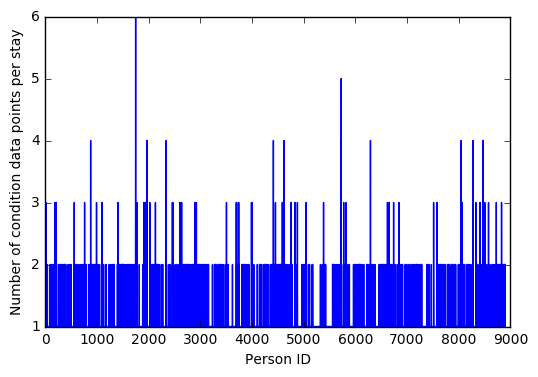

In [39]:
plt.plot(sizes)
plt.xlabel('Person ID')
plt.ylabel('Number of condition data points per stay')
plt.show()

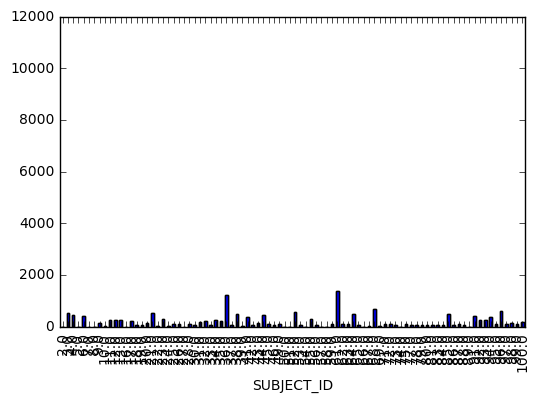

In [23]:
plt.show()

In [ ]:
for key, item in groupByPatient:
    print (len(groupByPatient.get_group(key)), "\n\n")

# Label Records

In [ ]:
# Using values from chartevents, labvalues, outputevents - label them accordingly

"""
Demographics/Static: Shock Index, Elixhauser, SIRS, Gender, Re-admission, GCS - Glasgow
Coma Scale, SOFA - Sequential Organ Failure Assessment, Age
Lab Values: Albumin, Arterial pH, Calcium, Glucose, Hemoglobin, Magnesium, PTT -
Partial Thromboplastin Time, Potassium, SGPT - Serum Glutamic-Pyruvic Transaminase, Arterial
Blood Gas, BUN - Blood Urea Nitrogen, Chloride, Bicarbonate, INR - International Normalized
Ratio, Sodium, Arterial Lactate, CO2, Creatinine, Ionised Calcium, PT - Prothrombin Time, Platelets
Count, SGOT - Serum Glutamic-Oxaloacetic Transaminase, Total bilirubin, White Blood Cell Count
Vital Signs: Diastolic Blood Pressure, Systolic Blood Pressure, Mean Blood Pressure, PaCO2,
PaO2, FiO2, PaO/FiO2 ratio, Respiratory Rate, Temperature (Celsius), Weight (kg), Heart Rate, SpO2
Intake and Output Events: Fluid Output - 4 hourly period, Total Fluid Output, Mechanical
Ventilation
"""

def label_records():
    

# Extract Time Series

# Bucket into Stays

# 4 Hour Intervals